# mediapipe/solutions
https://developers.google.com/mediapipe/solutions/examples

# Face Detection
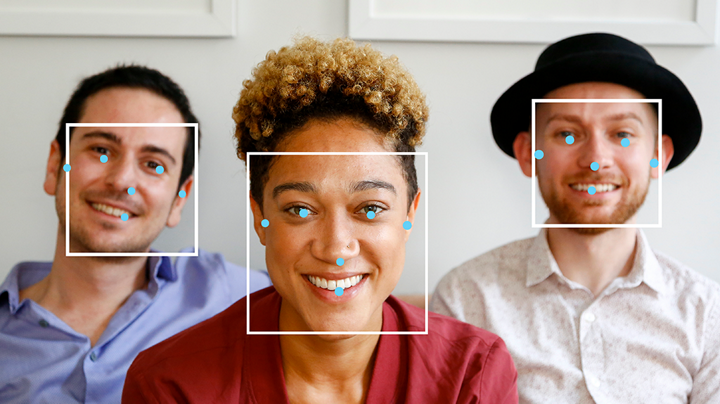

In [2]:
import cv2
import mediapipe as mp

# Load the pre-trained MediaPipe Face Detection model
mp_face_detection = mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.5)

# Initialize video capture from the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    
    if not ret:
        break

    # Convert the frame to RGB format (MediaPipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use MediaPipe to detect faces in the frame
    results = mp_face_detection.process(frame_rgb)

    # Process face detection results
    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                         int(bboxC.width * iw), int(bboxC.height * ih)
            face_roi = frame[y:y+h, x:x+w]

            # Draw bounding box around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the result
    cv2.imshow('Face Detection', frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\trueh\anaconda3\envs\test\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


# Facial Landmarks
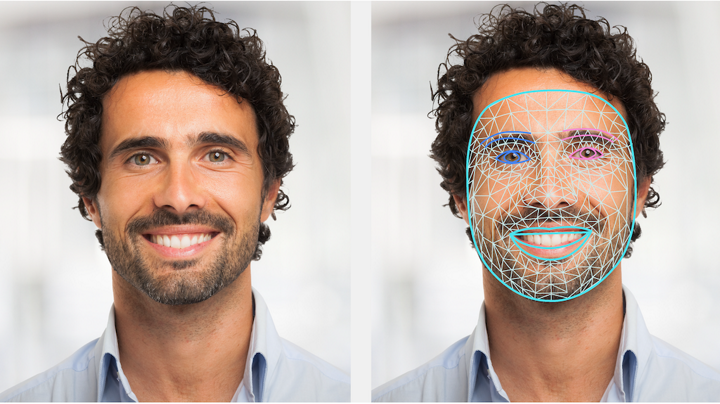

In [10]:
import cv2
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
# Initialize Mediapipe FaceMesh
#mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, q1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    static_image_mode=False,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as mp_face_mesh:
# Initialize video capture from the default camera (usually the webcam)
    cap = cv2.VideoCapture(0)
    
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        
        if not ret:
            break
    
        # Convert the frame to RGB format (Mediapipe requires RGB input)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
        # Process the frame to detect the facial landmarks
        results = mp_face_mesh.process(frame_rgb)
    
        # Draw facial landmarks on the face
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                for landmark in face_landmarks.landmark:
                    # Get the x and y coordinates of the landmark and convert them to pixel values
                    ih, iw, _ = frame.shape
                    x, y = int(landmark.x * iw), int(landmark.y * ih)
    
                    # Draw a circle at each facial landmark point
                    cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
    
        # Display the result
        cv2.imshow('Facial Landmarks', frame)
    
        # Exit the loop when 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()


# Hand Detection
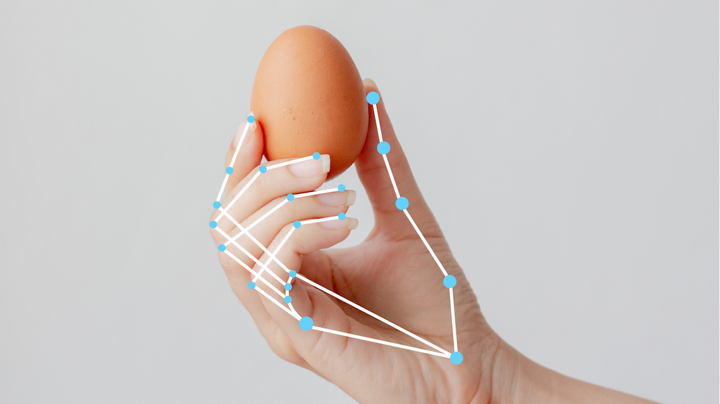

In [5]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize video capture from the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    
    if not ret:
        break

    # Convert the frame to RGB format (Mediapipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame to detect hands
    results = mp_hands.process(frame_rgb)

    # Draw hand landmarks on the frame
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for landmark in hand_landmarks.landmark:
                # Get the x and y coordinates of the landmark and convert them to pixel values
                ih, iw, _ = frame.shape
                x, y = int(landmark.x * iw), int(landmark.y * ih)

                # Draw a circle at each hand landmark point
                cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

            # Draw hand connections (lines between landmarks)
            mp.solutions.drawing_utils.draw_landmarks(frame, hand_landmarks, mp.solutions.hands.HAND_CONNECTIONS, landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4))

    # Display the result
    cv2.imshow('Hand Detection', frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# Pose Detection
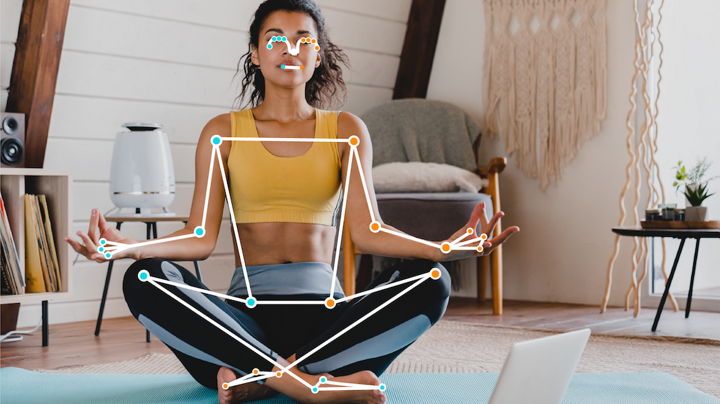

In [6]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose.Pose(static_image_mode=False, model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize video capture from the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    
    if not ret:
        break

    # Convert the frame to RGB format (Mediapipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame to detect poses
    results = mp_pose.process(frame_rgb)

    # Draw pose landmarks on the frame
    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(frame, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS, landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=4))

    # Display the result
    cv2.imshow('Pose Detection', frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
